# Exercise 1
 <p><div class="lev1"><a href="#Task-A.-Another-LEGO-brick-in-the-wall"><span class="toc-item-num">Task A.&nbsp;&nbsp;</span>Another LEGO brick in the wall</a></div>
 <p><div class="lev1"><a href="#Task-B.-Drop-the-Bike"><span class="toc-item-num">Task B.&nbsp;&nbsp;</span>Drop the Bike</a></div>

In [1]:
# Add your imports here
import os
import pandas as pd
import numpy as np
import re # Is it ok to have this
import matplotlib.pyplot as plt
from datetime import datetime # for part B3

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 7]

In [3]:
DATA_FOLDER = 'data'

## Task A. Another LEGO brick in the wall

LEGO is a popular brand of toy building bricks. They are often sold in sets in order to build a specific object. Each set contains a number of parts in different shapes, sizes and colors. This database contains information on which parts are included in different LEGO sets. It was originally compiled to help people who owned some LEGO sets already figure out what other sets they could build with the pieces they had.

This dataset contains the official LEGO colors, parts, inventories (i.e., sets of LEGO parts which assembled create an object in the LEGO world) and sets (i.e., sets of LEGO inventories which assembled create a LEGO ecosystem). The schema of the dataset can be shown in the following UML diagram: 

![lego-schema](lego-schema.png)

In this task you have to apply the following Data Wrangling pipeline:
1. Load your data into `Pandas`
* Explore it and clean its dirty parts
* Use it to answer a set of queries

Each of these subtasks are described in detail below.

### A1. Loading phase
Load all the csv files into different `DataFrames`. Use meaningful names for your `DataFrames` (e.g., the respective filenames).

*Hint: You can load files without first unzipping them (for `Pandas` version >= 0.18.1).*

In [4]:
LEGO_DATA_FOLDER = DATA_FOLDER + '/lego/'
LEGO_DATA_FOLDER

'data/lego/'

In [5]:
# Write your code here
files = os.listdir(LEGO_DATA_FOLDER)
data_set = dict()
for file in files:
    name = file.split('.')[0]
    df = pd.read_csv(LEGO_DATA_FOLDER + '/' +file)
    exec(name + '= df')

### A2. Cleaning phase
Explore the following columns from your dataset:

1. sets: year
* inventory_parts: quantity

What is the time range of the sets? 
What is the average quantity of the inventory parts? 
Do you see any inconsistencies? 
Provide code that detects and cleans such inconsistencies and validates the coherence of your dataset. 

#### This part is dedicated to sets

In [6]:
# We first take a look at the table
sets.sort_values(ascending=True,by=['year']).year.unique()

array(['-1962', '-1966', '-1969', '-1971', '-1973', '-1975', '-1977',
       '-1979', '-1980', '-1981', '-1982', '-1983', '-1984', '-1985',
       '-1986', '-1987', '-1988', '-1989', '-1991', '-1992', '-1993',
       '-1994', '-1995', '-1996', '-1997', '-19977', '-1998', '-1999',
       '-19999', '-2000', '-20000', '-2001', '-20011', '-2002', '-20022',
       '-2003', '-20033', '-2004', '-20044', '-2005', '-2006', '-20066',
       '-2007', '-20077', '-2008', '-2009', '-20099', '-2010', '-20100',
       '-2011', '-20111', '-2012', '-20122', '-2013', '-20133', '-2014',
       '-20144', '-2015', '-20155', '-2016', '-20166', '-2017', '1950',
       '1953', '1954', '1955', '19555', '1956', '1957', '1958', '1959',
       '1960', '1961', '1962', '19622', '1963', '1964', '1965', '1966',
       '19666', '1967', '1968', '1969', '19699', '1971', '1972', '19722',
       '1973', '1974', '1975', '1976', '1977', '19777', '1978', '19788',
       '1979', '19799', '19800', '1981', '19811', '1982', '1982

As we can see, $\text{range}\in [1950:2017]$  
Which is consistent with the creation of the compagnie LEGO (created in 1949)

We can clean the data in a way that any incoherence is turned into NaN values:

In [7]:
sets_cleaned = sets.copy()

# Only keeping values between [1949 : 2018] and everything else to NaN
sets_cleaned['year'] = sets_cleaned['year'].apply(lambda x: pd.to_numeric(x, errors='coerce'))
sets_cleaned.loc[~sets_cleaned['year'].between(1949,2018) , 'year'] = np.nan

# Check
print("Proportion of kept data:",100*sets_cleaned.year.dropna().count()/sets.year.count(), '%')
sets_cleaned.sort_values(ascending=True,by=['year'])['year'].unique()

Proportion of kept data: 73.57148976270025 %


array([1950., 1953., 1954., 1955., 1956., 1957., 1958., 1959., 1960.,
       1961., 1962., 1963., 1964., 1965., 1966., 1967., 1968., 1969.,
       1971., 1972., 1973., 1974., 1975., 1976., 1977., 1978., 1979.,
       1981., 1982., 1983., 1984., 1985., 1986., 1987., 1988., 1989.,
       1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997., 1998.,
       1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006., 2007.,
       2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015., 2016.,
       2017.,   nan])

As we can see, we keep **73%** a the dataset.  
But if we want to keep as much data as possible, we have to infer the values of the year as follow:
- Remove '-' from negative numbers, assuming the years are positive
- We don't know what year, 70s and 80s are corresponding exactly, we should convert them to NaN 
- Convert into float, otherwise NaN numbers can't be represented
- Keep only the first 4 digits. We noticed that when there is more than 4 digits, it is always the last one which is duplicated

In [8]:
sets_cleaned = sets.copy()

# Remove any '-':
sets_cleaned['year'] = sets_cleaned['year'].apply(lambda x: x.replace('-', ''))

# Take the first 4 digits str convert into floats
sets_cleaned['year'] = sets_cleaned['year'].apply(lambda x: pd.to_numeric(x[:4], errors='coerce'))

# Check
print("Proportion of kept data:",100*sets_cleaned.year.dropna().count()/sets.year.count(), '%')
sets_cleaned.sort_values(ascending=True,by=['year'])['year'].unique()

Proportion of kept data: 99.02338730403496 %


array([1950., 1953., 1954., 1955., 1956., 1957., 1958., 1959., 1960.,
       1961., 1962., 1963., 1964., 1965., 1966., 1967., 1968., 1969.,
       1971., 1972., 1973., 1974., 1975., 1976., 1977., 1978., 1979.,
       1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987., 1988.,
       1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997.,
       1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006.,
       2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
       2016., 2017.,   nan])

As we can see, $\text{range}\in [1950:2017]$  
And we keep **99%** of the data in this case

#### This part is dedicated to inventory_parts: quantity DataFrame
We need to account the following possible issues to keep as much data as possible:
- In 'quantity' there are non finite values, we need to convert them into NaN
- Negative values must be positives because negative quantity isn't possible but we assume the value is still correct 

In [9]:
inventory_parts.sample(10,random_state=1)

,inventory_id,part_id,color_id,quantity,is_spare
444192,13009,2301,4,4.000000,f
493584,14494,3022,0,1.000000,f
555754,16325,60219,72,-inf,f
223756,6656,3001,71,3.000000,f
86179,2573,3022,15,-inf,f
251236,7473,3680,0,1.000000,f
564289,16813,3023,378,3.000000,f
151571,4516,93058,297,-inf,f
165194,4952,4229,0,8.000000,f
483214,14208,59900,72,1.000000,f


In [10]:
# First we need to clean/convert numeric values from 'quantity' columns
# Floor for non integer values!
inv_part_cleaned = inventory_parts.copy()
inv_part_cleaned['quantity'] = pd.to_numeric(inv_part_cleaned['quantity'],errors='coerce')
inv_part_cleaned['quantity'] = inv_part_cleaned['quantity'].apply(lambda x: np.nan if (~np.isfinite(x)) else abs(x))

print("Proportion of kept data:",100*inv_part_cleaned.quantity.dropna().count()/inventory_parts.quantity.count(),'%')
inv_part_cleaned.sample(10,random_state=1)

Proportion of kept data: 72.11620488374858 %


,inventory_id,part_id,color_id,quantity,is_spare
444192,13009,2301,4,4.0,f
493584,14494,3022,0,1.0,f
555754,16325,60219,72,NaN,f
223756,6656,3001,71,3.0,f
86179,2573,3022,15,NaN,f
251236,7473,3680,0,1.0,f
564289,16813,3023,378,3.0,f
151571,4516,93058,297,NaN,f
165194,4952,4229,0,8.0,f
483214,14208,59900,72,1.0,f


In [11]:
print("Are ['inventory_id', 'part_id', 'color_id'] forming a primary key?")
~inv_part_cleaned[['inventory_id', 'part_id', 'color_id']].duplicated().any()

Are ['inventory_id', 'part_id', 'color_id'] forming a primary key?


False

As we can see from the previous line, the inventory_id, part_id, color_id isn't a unique key, we need to groupy inventory_id, part_id and color_id to create unique entries, we assume that if an entry is duplicated it mean that one has been added instead of uploading the existing one so we need to sum the quantity

In [12]:
# Remove any duplicates of meta_id using groupby and summing the corresponding quantities to keep track of parts quantity
new_pinventory = inv_part_cleaned.groupby(['inventory_id', 'part_id', 'color_id']).agg({'quantity': 'sum'}).reset_index()

In [13]:
# Now the cleaned data looks like this:
new_pinventory.sample(10,random_state=1)

,inventory_id,part_id,color_id,quantity
91312,2868,4485,0,1.0
516992,15896,3011,2,1.0
7342,210,3829c01,15,1.0
110074,3437,2540,0,1.0
187745,5846,30374,42,1.0
488179,15042,6111,0,1.0
40984,1292,3460,14,0.0
184800,5754,30374,41,0.0
269891,8438,2357,71,4.0
511018,15713,3010p08,4,1.0


'is_spare' column has disappeared, we don't need this information so we don't have to keep it.

Finally, we get the answer about the average quantity per entries in inventory_parts table:

In [14]:
print("Average quantity of inventory parts:", new_pinventory.quantity.mean())

Average quantity of inventory parts: 2.903793810032789


### A3. Querying phase
Answer the following queries using the functionality of `Pandas`:

1. List the ids of the inventories that belong to sets that contain cars. (*Hint: Find a smart way to distinguish which sets contain cars based on the sets' name*).

* Plot the distribution of part categories as a (horizontal) bar chart. Restrict yourself to the 20 largest part categories (in terms of the number of parts belonging to the category).

* Find the dominant color of each set. Then, plot using a (horizontal) bar chart, the number of sets per dominant color. Color each bar with the respective color that it represents.

* Create a scatter plot of the *luminance*\* of the sets vs their publishing year. What do you observe for the years 1980-1981? How do you interpret what you see?

\*The luminance of a color is a [measure of brightness](https://en.wikipedia.org/wiki/Luminance) which, given its RGB representation, can be computed as follows:

$luminance = \sqrt{0.299*R^2 + 0.587*G^2 + 0.114*B^2}$

**1. List the ids of the inventories that belong to sets that contain cars. (*Hint: Find a smart way to distinguish which sets contain cars based on the sets' name*).**

In [15]:
# Merging dataset to link inventory ids with the associated sets name
inven_sets_merged=pd.merge(inventory_sets, sets, left_on='set_id', right_on='id')
ans = inven_sets_merged[inven_sets_merged['name'].str.contains(' car | cars ', case=False, regex=True)]['inventory_id'].values
print("List of Ids of the inventories containing 'car' or 'cars' in \033[1msets\033[0m:\n", np.unique(ans))

List of Ids of the inventories containing 'car' or 'cars' in sets:
 [  500   908  1716  2559  2814  6296  7881  8202  8348  8820 10028 10158
 12110 12437 12851 13083]


**2. Plot the distribution of part categories as a (horizontal) bar chart. Restrict yourself to the 20 largest part categories (in terms of the number of parts belonging to the category).**

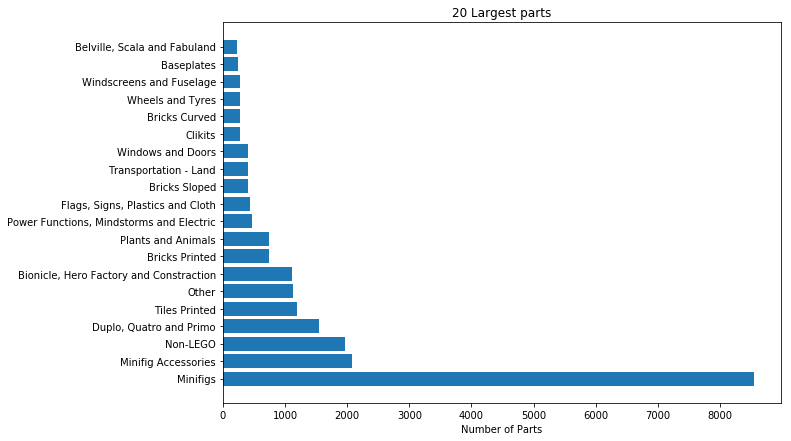

In [16]:
# Counting the number of part_categories getting the 20 biggest and joining to get the name
huge_parts = pd.DataFrame(parts.part_cat_id.value_counts()[:20]).join(part_categories.set_index('id'))
huge_parts.columns=['nb_parts', 'name']

# * Plotting *
plt.barh(huge_parts.name, huge_parts.nb_parts) # Make LEGO great again ! xD
plt.xlabel("Number of Parts")
plt.title('20 Largest parts')
plt.show()

3. **Find the dominant color of each set. Then, plot using a (horizontal) bar chart, the number of sets per dominant color. Color each bar with the respective color that it represents.**

In [17]:
# First w merge our 'new_pinventory' (which is the cleaned version of inventory_parts) with inventory_sets
merged_sets = new_pinventory.reset_index().merge(inventory_sets[['set_id','inventory_id']], left_on='inventory_id', right_on='inventory_id')
merged_sets.sample(5)

,index,inventory_id,part_id,color_id,quantity,set_id
273,285574,8918,14,15,8.0,k1062b
264,283750,8871,6558,0,3.0,8905-1
162,267215,8348,3626bpr0387,14,1.0,7907-10
223,267217,8348,970c00,1,1.0,7907-22
311,285584,8918,3062a,46,8.0,1062-1


In [18]:
# For a given part, the color which has the more quantity is the dominating color
dom_colors = merged_sets.groupby(['set_id','color_id']).agg({'quantity' : 'sum'})

# Getting the dominating colors, keeping the first occurence if there is an equality
dom_colors = pd.DataFrame(dom_colors['quantity'].groupby(level=0, group_keys=False).nlargest(1).sort_values(ascending=False)).reset_index()

# Check if there is no duplicated tuple made of (set_id,color_id):
print("Is set_id <-> color_id unique?: ",dom_colors['set_id'].is_unique)
print("Dominate color for each set:")

# Using head(5) to avoid printing too much....
dom_colors.head(5)

Is set_id <-> color_id unique?:  True
Dominate color for each set:


,set_id,color_id,quantity
0,pk1062,15,62.0
1,1062-1,15,62.0
2,1064-1,15,62.0
3,k1062b,15,62.0
4,10173-1,72,16.0


In [19]:
# Merging for the dominant color plot
dom_colors_sort = dom_colors['color_id'].value_counts().to_frame('frequency').reset_index()
dom_colors_sort = colors.merge(dom_colors_sort, left_on='id', right_on='index').sort_values('frequency',ascending=False).drop(columns=['index'])
print("Number of sets per dominant color:")
dom_colors_sort

Number of sets per dominant color:


,id,name,rgb,is_trans,frequency
8,89,Royal Blue,4C61DB,f,41
10,9999,[No Color],05131D,f,40
1,0,Black,05131D,f,36
0,-1,Unknown,0033B2,f,29
9,178,Flat Dark Gold,B48455,f,6
4,15,White,FFFFFF,f,5
2,2,Green,237841,f,4
5,71,Light Bluish Gray,A0A5A9,f,3
3,4,Red,C91A09,f,2
6,72,Dark Bluish Gray,6C6E68,f,2


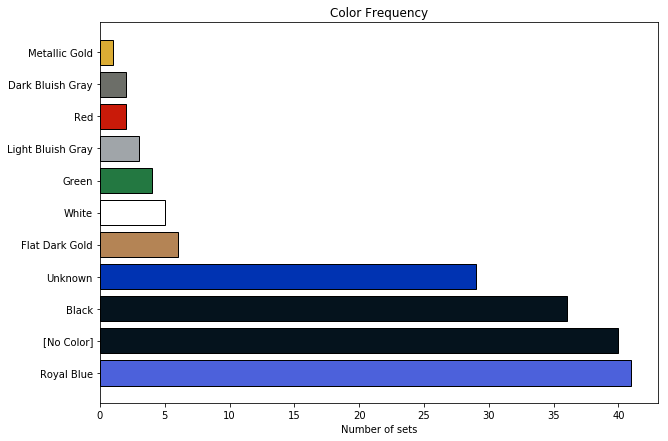

In [20]:
# * Plotting *
plt.barh(dom_colors_sort.name, dom_colors_sort.frequency, color=('#'+dom_colors_sort.rgb),edgecolor='black')
plt.xlabel("Number of sets")
plt.title('Color Frequency')
plt.show()

**4. Create a scatter plot of the *luminance* of the sets vs their publishing year. What do you observe for the years 1980-1981? How do you interpret what you see?**

\*The luminance of a color is a [measure of brightness](https://en.wikipedia.org/wiki/Luminance) which, given its RGB representation, can be computed as follows:

$luminance = \sqrt{0.299*R^2 + 0.587*G^2 + 0.114*B^2}$

In [21]:
# Merging following tables to link year <-> colors : sets -> inventory_sets -> inventory_parts -> colors
plot_luminance = sets_cleaned[['id','year']].merge(inventory_sets[['set_id','inventory_id']] , left_on='id', right_on='set_id')

print(sets_cleaned.shape)
print(inventory_sets.shape)
print(plot_luminance.shape)

(11673, 5)
(2846, 3)
(2846, 4)


In [22]:
plot_luminance = plot_luminance[['year','set_id','inventory_id']].merge(new_pinventory[['inventory_id','color_id']], left_on='inventory_id', right_on='inventory_id')
print(new_pinventory.shape)
print(plot_luminance.shape)
plot_luminance = plot_luminance.merge(colors[['id','name','rgb']],left_on='color_id', right_on='id')

# Keeping only the relevant columns
plot_luminance = plot_luminance[['set_id','rgb','year']]

# Splitting the RGB columns into 3 distinct columns to manipulate R,G,B 
plot_luminance['R'] = plot_luminance.rgb.apply(lambda x: int(x[0:2],16))
plot_luminance['G'] = plot_luminance.rgb.apply(lambda x: int(x[2:4],16))
plot_luminance['B'] = plot_luminance.rgb.apply(lambda x: int(x[4:6],16))

plot_luminance.drop(columns='rgb',inplace=True)

# Computing the luminance and adding to a new column
plot_luminance['lum'] = np.sqrt(0.299*np.power(plot_luminance.R,2)+0.587*np.power(plot_luminance.G,2)+0.114*np.power(plot_luminance.B,2) )

# Check
plot_luminance.sample(10)

(552927, 4)
(432, 4)


,set_id,year,R,G,B,lum
220,k1062b,1981.0,255,255,255,255.000000
140,7907-5,2007.0,5,19,29,17.755450
69,9700-1,1987.0,5,19,29,17.755450
163,7907-15,2007.0,0,85,191,91.651017
84,9750-1,1986.0,5,19,29,17.755450
336,4346-1,2004.0,0,51,178,71.685166
57,8772-1,2004.0,5,19,29,17.755450
175,7907-3,2007.0,0,85,191,91.651017
381,7907-21,2007.0,242,205,55,206.213872
267,1062-1,NaN,155,161,157,158.773701


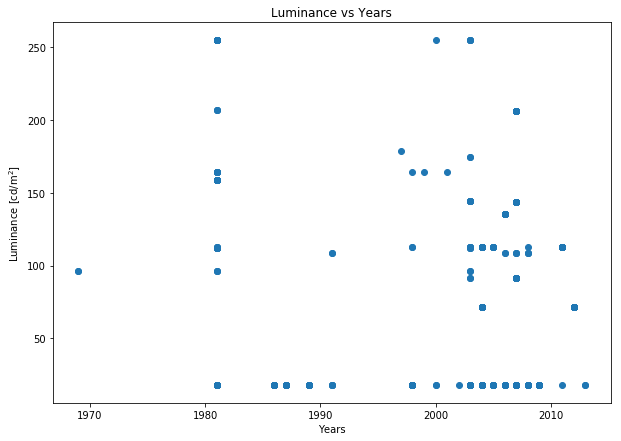

In [23]:
# * Plotting *
plt.scatter(plot_luminance.year, plot_luminance.lum)
plt.xlabel("Years")
plt.ylabel("Luminance [cd/m$^2$]")
plt.title('Luminance vs Years')
plt.show()

For the years *1980-1981* it appears that the contrast for differents sets has improved. They must have decided to diversify their products colors.

Remark: When merging, if an `id` doesn't exist in both `DataFrames`, the corresponding line is dropped, thus we have some missing years because of missing `set_id` in the the `inventory_set` `DataFrame`. The same effect appears between `inventory_set` and `inventory_parts`

## Task B. Drop the bike

*Los Angeles Metro* has been sharing publicly [anonymized *Metro Bike Share* trip data](https://bikeshare.metro.net/about/data/) under the [Open Database License (ODbL)](http://opendatacommons.org/licenses/odbl/1.0/).

In this task you will again perform data wrangling and interpretation.

### B1. Loading phase
Load the json file into a `DataFrame`.


In [24]:
BIKES_DATA_FOLDER = DATA_FOLDER + '/bikes/'

In [25]:
# Write your code here
bike_data = pd.read_json(BIKES_DATA_FOLDER+'metro-bike-share-trip-data.json.zip')


### B2. Cleaning phase
Describe the type and the value range of each attribute. Indicate and transform the attributes that are `Categorical`. Are there redundant columns in the dataset (i.e., are there columns whose value depends only on the value of another column)? What are the possible pitfalls of having such columns? Reduce *data redundancy* by extracting such columns to separate `DataFrames`. Which of the two formats (the initial one or the one with reduced data redundancy) is more susceptible to inconsistencies? At the end print for each `Dataframe` the *type of each column* and it's *shape*.

In [26]:
# A quick view at the Dataset
bike_data.sample(5)

,Bike ID,Duration,End Time,Ending Station ID,Ending Station Latitude,Ending Station Longitude,Passholder Type,Plan Duration,Start Time,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Trip ID,Trip Route Category
40035,6552.0,420,2016-09-07T12:37:00,3064.0,34.046810,-118.256980,Walk-up,0.0,2016-09-07T12:30:00,3034.0,34.042061,-118.263380,5350259,One Way
106904,6198.0,420,2017-01-27T14:01:00,3077.0,34.039871,-118.250038,Monthly Pass,30.0,2017-01-27T13:54:00,3074.0,34.044170,-118.261169,18715403,One Way
92977,5802.0,300,2016-12-13T07:11:00,3014.0,34.056610,-118.237213,Monthly Pass,30.0,2016-12-13T07:06:00,3030.0,34.051941,-118.243530,15855516,One Way
67138,6294.0,480,2016-10-19T17:34:00,3074.0,34.044170,-118.261169,Monthly Pass,30.0,2016-10-19T17:26:00,3024.0,34.057720,-118.248970,10621323,One Way
126496,5771.0,240,2017-03-19T01:00:00,3037.0,34.034801,-118.231277,Flex Pass,365.0,2017-03-19T00:56:00,3048.0,34.041691,-118.235352,22538474,One Way


In [27]:
##### We are asked to describe the dataset
print("\033[1mDescriptions of the dataset:\033[0;0m")
for k in bike_data.columns:
    print("\033[1m",k, "\033[0;0m: type is", bike_data[k].dtype, "and range:",  bike_data[k].min() ,":", bike_data[k].max())

Descriptions of the dataset:
 Bike ID : type is float64 and range: 1349.0 : 6728.0
 Duration : type is int64 and range: 60 : 86400
 End Time : type is object and range: 2016-07-07T04:20:00 : 2017-04-02T10:32:00
 Ending Station ID : type is float64 and range: 3000.0 : 4108.0
 Ending Station Latitude : type is float64 and range: 0.0 : 34.0642815
 Ending Station Longitude : type is float64 and range: -118.472832 : 0.0
 Passholder Type : type is object and range: Flex Pass : Walk-up
 Plan Duration : type is float64 and range: 0.0 : 365.0
 Start Time : type is object and range: 2016-07-07T04:17:00 : 2017-03-31T23:45:00
 Starting Station ID : type is float64 and range: 3000.0 : 4108.0
 Starting Station Latitude : type is float64 and range: 0.0 : 34.0642815
 Starting Station Longitude : type is float64 and range: -118.472832 : 0.0
 Trip ID : type is int64 and range: 1912818 : 23794218
 Trip Route Category : type is object and range: One Way : Round Trip


##### The following data are redundant:
- [Start Time, End Time] -> [Duration]
- [Starting Station, Ending Station] -> [Trip Route Category]
- [Plan Duration] -> [Passholer Type]

##### Redundancy in the dataset can create inconsistencies, for example:  
Start Time: 2016-11-08T17:03:30  
End Time: 2016-11-08T17:05:00   
Duration: 120  

Duration would normally be 90 but we cannot know which information is the correct right.

Each station ID has normally a unique longitude and latitude we can group them togethere to reduce redundancy  
Thus we can create those datasets instead to reduce redundancy and inconsistencies from the initial set:
- [Bike ID, End Time, Start Time, Ending Station ID, Starting Station ID, Passholder Type, Trip ID]
- [Station ID, Station Longitude, Station Latitude]
- [Passholder Type, Plan Duration]

In [28]:
# Creating the DataFrame made of: [Station ID, Station Longitude, Station Latitude]
stations_start = bike_data[['Starting Station ID', 'Starting Station Longitude', 'Starting Station Latitude']].drop_duplicates()
stations_end = bike_data[['Ending Station ID', 'Ending Station Longitude', 'Ending Station Latitude']].drop_duplicates()

# Taking median values to limit the influence of outliers
stations_start_mean = stations_start.groupby('Starting Station ID').median()
stations_end_mean = stations_end.groupby('Ending Station ID').median()

# Merging Start and Ending Stations coordinates to form the final DataFrame
stations = stations_end_mean.join(stations_start_mean)[['Ending Station Longitude', 'Ending Station Latitude']]
stations.columns = [ 'Station Longitude', 'Station Latitude']
stations.index.name = 'Station ID'

stations.sample(10)

,Station Longitude,Station Latitude
Station ID,,
3067.0,-118.250238,34.045181
3027.0,-118.247161,34.049980
3032.0,-118.255881,34.049889
3056.0,-118.265380,34.037460
3008.0,-118.262732,34.046612
3022.0,-118.233092,34.046070
3030.0,-118.243530,34.051941
3059.0,-118.256270,34.037949
3052.0,-118.264558,34.051102


In [29]:
# DF made of: [Passholder Type, Plan Duration]
pass_duration = bike_data[['Passholder Type', 'Plan Duration']].drop_duplicates()
pass_duration = pass_duration.reset_index(drop=True)
pass_duration

,Passholder Type,Plan Duration
0,Monthly Pass,30.0
1,Flex Pass,365.0
2,Walk-up,0.0
3,Staff Annual,NaN
4,Monthly Pass,NaN


In [30]:
# DF made of: [Bike ID, End Time, Start Time, Ending Station ID, Starting Station ID, Passholder Type, Trip ID]
df_reduced = bike_data[['Bike ID', 'End Time', 'Start Time', 'Ending Station ID', 'Starting Station ID', 'Passholder Type', 'Trip ID']]#.drop_duplicates()
df_reduced.head(10)

,Bike ID,End Time,Start Time,Ending Station ID,Starting Station ID,Passholder Type,Trip ID
0,6281.0,2016-07-07T04:20:00,2016-07-07T04:17:00,3014.0,3014.0,Monthly Pass,1912818
1,6281.0,2016-07-07T06:33:00,2016-07-07T06:00:00,3014.0,3014.0,Monthly Pass,1919661
2,5861.0,2016-07-07T10:37:00,2016-07-07T10:32:00,3016.0,3016.0,Flex Pass,1933383
3,5861.0,2016-07-07T13:38:00,2016-07-07T10:37:00,3016.0,3016.0,Flex Pass,1944197
4,6674.0,2016-07-07T12:58:00,2016-07-07T12:51:00,3032.0,3032.0,Walk-up,1940317
5,6717.0,2016-07-07T13:04:00,2016-07-07T12:51:00,3054.0,3021.0,Monthly Pass,1944075
6,5721.0,2016-07-07T13:04:00,2016-07-07T12:54:00,3014.0,3022.0,Monthly Pass,1944073
7,5957.0,2016-07-07T13:09:00,2016-07-07T12:59:00,3005.0,3076.0,Flex Pass,1944067
8,6137.0,2016-07-07T13:49:00,2016-07-07T13:01:00,3031.0,3031.0,Flex Pass,1944062
9,6351.0,2016-07-07T13:17:00,2016-07-07T13:01:00,3078.0,3031.0,Monthly Pass,1944063


### B3. Querying phase
Answer the following queries using the functionality of `Pandas`.

1. Plot the *distribution* of the number of outgoing trips from each station in a histogram with 20 bins (Hint: each bin describes a range of counts, not stations).
* Plot histograms for the *duration* and *trip starting hour in the day* attributes. For both the *duration*  and the *trip starting hour* use *discrete 1-hour intervals*. What do you observe in each plot? What are some popular values in the *duration* plot? Explain the local maxima and the trends you observe on the *trip starting hour* plot based on human behavior.
* For each *trip route category*, calculate the proportion of trips by *passholder type* and present your results in *a stacked bar chart with normalized height*.
* Considering only trips that begin in the morning hours (before noon), plot in *a single bar chart* the proportion of trips by *passholder type* and *trip route category*. Explain any outliers you observe.
* Separate the hours of the day into two intervals that have (approximately) the same number of bikes leaving the stations. For each of the two intervals calculate the proportion of trips by *passholder type* and *trip route category*. Present your results in a `DataFrame` which has a unique, non-composite index. Does the proportion of trips depend on whether it is the first or second hour interval? Would the company have any significant benefit by creating a more complex paying scheme where monthly pass users would pay less in the first interval and (equally) more on the second one? Assume that the number of trips per interval will not change if the scheme changes.

**1. Plot the *distribution* of the number of outgoing trips from each station in a histogram with 20 bins (Hint: each bin describes a range of counts, not stations).**

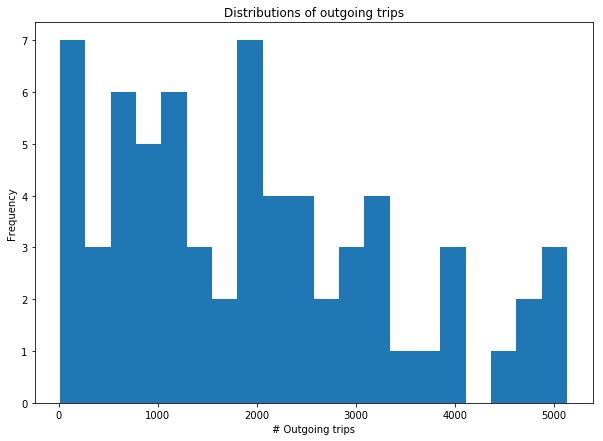

In [31]:
# The number of outgoing trips for a given station is equivalent to
# the number of occurences of this station in the DataFrame
plt.hist(df_reduced['Starting Station ID'].value_counts(), bins=20)
plt.xlabel("# Outgoing trips")
plt.ylabel("Frequency")
plt.title('Distributions of outgoing trips')
plt.show()

**2. Plot histograms for the *duration* and *trip starting hour in the day* attributes. For both the *duration*  and the *trip starting hour* use *discrete 1-hour intervals*. What do you observe in each plot? What are some popular values in the *duration* plot? Explain the local maxima and the trends you observe on the *trip starting hour* plot based on human behavior.**

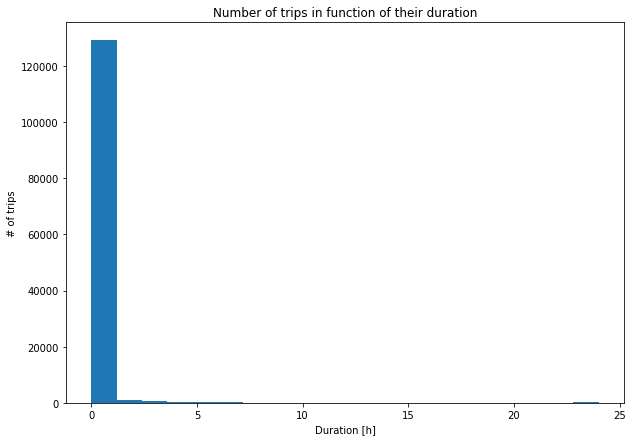

In [32]:
durations = bike_data['Duration'].apply(lambda x: int(x/3600)).values
plt.hist(durations, bins=20)
plt.xlabel("Duration [h]")
plt.ylabel("# of trips")
plt.title('Number of trips in function of their duration')  
plt.show()

###### In the previous plot we observe that:

- By far the most popular value is 0, meaning that most trips last less than an hour. We hypothesize that this is due to the fact that a large proportion of people use the bikes to go to work and return home. If it took more than 1h to do that, people would prefer driving their cars instead.

- Another hypotesis can be made that trips shorter than 1 hour are free of charge for all passholder types. In this case users would prefer taking short trips.

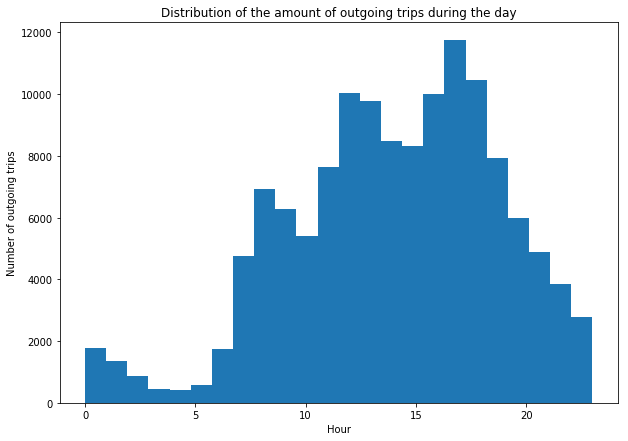

In [33]:
hours = bike_data['Start Time'].apply(lambda x: datetime.strptime(x, '%Y-%m-%dT%H:%M:%S').hour)
plt.hist(hours, bins= 24)
plt.xlabel("Hour")
plt.ylabel("Number of outgoing trips")
plt.title('Distribution of the amount of outgoing trips during the day')
plt.show()

###### In the previous plot we observe that:
- Global minima is at 4 A.M
- Global maxima is at 5 P.M
- Local maxima at noon and 8 A.M
- This histogram let us see human activity. Practically no activity during the night but a lot of travelling during the day. We also observe peaks of activity at times when people go to work, the lunch break and finally when they go home.

3. **For each trip route category, calculate the proportion of trips by passholder type and present your results in a stacked bar chart with normalized height.**

In [34]:
# We count the number of Trip for a given Route Category AND Passholder Type
bike_grouped = bike_data.groupby(['Trip Route Category', 'Passholder Type']).agg({'Passholder Type':'count'})
bike_grouped.columns=['count']

# Separating Data: bike_one := 'One Way' | bike_round := 'Round Trip'
bike_one, bike_round = bike_grouped[:4], bike_grouped[4:]

# Compute proportions and remove multi-index
bike_one = bike_one.groupby(level=0).apply(lambda x: x / x.sum()).reset_index()
bike_round = bike_round.groupby(level=0).apply(lambda x: x / x.sum()).reset_index()

In [35]:
bike_pivoted = pd.concat([bike_one, bike_round])
bike_pivoted = bike_pivoted.pivot(index='Trip Route Category', columns='Passholder Type', values='count')

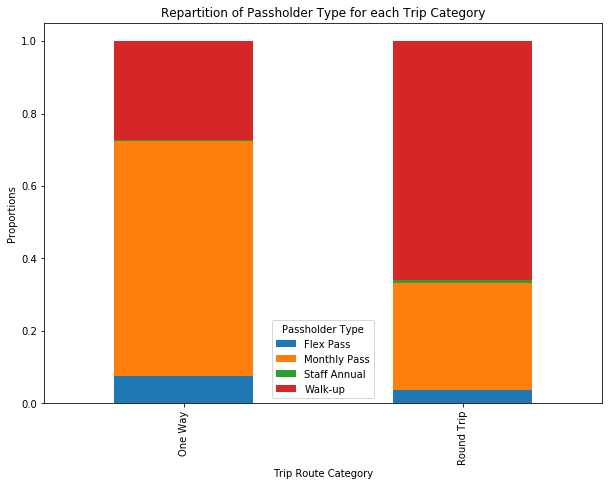

In [36]:
bike_pivoted.plot.bar(stacked=True, figsize=(10,7))

plt.ylabel("Proportions")
plt.title('Repartition of Passholder Type for each Trip Category')
plt.show()

4. **Considering only trips that begin in the morning hours (before noon), plot in a single bar chart the proportion of trips by passholder type and trip route category. Explain any outliers you observe.**


In [37]:
# Selectin only trip that start before noon and then grouping by Route Category and Passholder Type to get proportions
morning_trips = bike_data[bike_data['Start Time'].apply(lambda x: datetime.strptime(x, '%Y-%m-%dT%H:%M:%S').hour) < 12]
count_morning_per_type = morning_trips.groupby(['Trip Route Category', 'Passholder Type']) \
                                        .agg({'Trip ID':'count'}).apply(lambda x: x*100/x.sum())

count_morning_per_type.columns=['count']

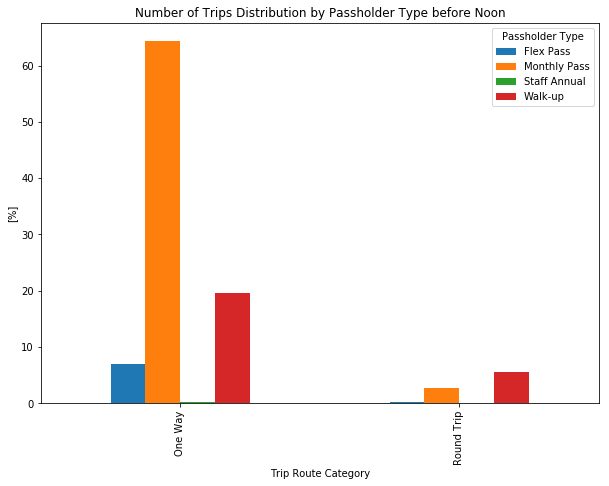

In [38]:
a= count_morning_per_type.reset_index()
a=a.pivot(index='Trip Route Category', columns='Passholder Type')
a['count'].plot(kind='bar')
plt.ylabel("[%]")
plt.title('Number of Trips Distribution by Passholder Type before Noon')
plt.show()

5. **Separate the hours of the day into two intervals that have (approximately) the same number of bikes leaving the stations. For each of the two intervals calculate the proportion of trips by passholder type and trip route category. Present your results in a DataFrame which has a unique, non-composite index. Does the proportion of trips depend on whether it is the first or second hour interval? Would the company have any significant benefit by creating a more complex paying scheme where monthly pass users would pay less in the first interval and (equally) more on the second one? Assume that the number of trips per interval will not change if the scheme changes.**

In [39]:
### Why do we start at 00:00 and not at 8 AM?
bike_data['hours'] = bike_data['Start Time'].apply(lambda x: datetime.strptime(x, '%Y-%m-%dT%H:%M:%S').hour)
hour_sorted = bike_data.sort_values(by='hours')

# After sorting we get easily the median values by spliting
mid_length = int(len(hour_sorted.hours)/2)

df_bike_early = hour_sorted[:mid_length]
df_bike_late = hour_sorted[mid_length+1:]

In [40]:
# Getting proportions of trips in each interval for a given Route Category and Passholder Type
df_early_prop = df_bike_early.groupby(['Trip Route Category', 'Passholder Type']).agg({'Passholder Type':'count'}).apply(lambda x: x / x.sum())
df_late_prop = df_bike_late.groupby(['Trip Route Category', 'Passholder Type']).agg({'Passholder Type':'count'}).apply(lambda x: x / x.sum())

# Renaming
df_early_prop.columns=['proportions']
df_late_prop.columns=['proportions']

df_early_prop['Name'] = "First Interval"
df_late_prop['Name'] = "Second Interval"

In [41]:
df_merged = pd.concat([df_early_prop, df_late_prop]).reset_index()
df_merged.pivot_table(index='Name', columns=['Trip Route Category','Passholder Type'], values='proportions')

Trip Route Category   One Way                                     Round Trip  \
Passholder Type     Flex Pass Monthly Pass Staff Annual   Walk-up  Flex Pass   
Name                                                                           
First Interval       0.069518     0.592784     0.002764  0.236041   0.004002   
Second Interval      0.066920     0.578149     0.001752  0.258982   0.003292   

Trip Route Category                                      
Passholder Type     Monthly Pass Staff Annual   Walk-up  
Name                                                     
First Interval          0.031142     0.000891  0.062858  
Second Interval         0.025826     0.000362  0.064715

- There isn't a big difference between the proportions of trips depending on the interval, the maximum observed difference is about 2.5% (observed in  *One Way* - > *Flex Pass*).

* There are more users in the *First Interval* for *Monthly Pass*, thus by reducing the price the company will decrease its profit.

* But another way to split a day would be at noon. Let's check what it gives.

In [42]:
bike_data['hours'] = bike_data['Start Time'].apply(lambda x: datetime.strptime(x, '%Y-%m-%dT%H:%M:%S').hour)
bike_morning = bike_data[bike_data['hours']<=12]
bike_afternoon = bike_data[bike_data['hours']>12]

In [43]:
bike_morning = bike_morning.groupby(['Trip Route Category', 'Passholder Type']).agg({'Passholder Type':'count'})
bike_afternoon = bike_afternoon.groupby(['Trip Route Category', 'Passholder Type']).agg({'Passholder Type':'count'})
bike_morning.columns = ['count']
bike_afternoon.columns = ['count']
bike_morning['Name'] = "Morning"
bike_afternoon['Name'] = "Afternoon"

In [44]:
df_merged = pd.concat([bike_morning, bike_afternoon]).reset_index()
df_merged.pivot_table(index='Name', columns=['Trip Route Category','Passholder Type'], values='count')

Trip Route Category   One Way                                   Round Trip  \
Passholder Type     Flex Pass Monthly Pass Staff Annual Walk-up  Flex Pass   
Name                                                                         
Afternoon                5704        47517          182   22537        313   
Morning                  3330        30015          117   10240        170   

Trip Route Category                                    
Passholder Type     Monthly Pass Staff Annual Walk-up  
Name                                                   
Afternoon                   2323           33    5604  
Morning                     1449           50    2843

- It is now possible to make more money by having a more complex paying scheme. Reducing the price in the morning and increasing it in the afternoon. For all paying trip, there is more in the afternoon. This also has the advantage that splitting the day at noon makes more sense.